In [3]:
import os,shutil
import h5py
from h5glance import H5Glance
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

In [39]:
def plotDiffr(input_data, idx_range = (1,2), n_diffr=2, vmin='diffr.min()', vmax='diffr.max()'):
    """ Plot the diffraction pattern.

    Args:
            input_data (str): input hdf5 file name.
            idx_range (list-like): idx_range to plot
                                   idx = 1 is the first frame
            n_diffr (int): number of diffractions to plot, it will use linspace in the idx_range.
            vmin (str): eval command for vmin in imshow
            vmax (str): eval command for vmax in imshow

    """
    with h5py.File(input_data,'r') as fh:
        print (fh['data'])
        plot_range = np.linspace(idx_range[0],idx_range[1],num=n_diffr)
        for i in plot_range:
            frame = '{:07}'.format(int(i))
            print (frame)
            diffr = fh['data/'+frame+'/diffr'][0]
            plt.figure()
            plt.imshow(diffr,norm=colors.LogNorm(vmin=eval(vmin), vmax=eval(vmax)),origin='lower')
            plt.colorbar()
            print ('mean={:.2f}, max={:.2f}, min={:.2f}'.format(diffr.mean(),diffr.max(),diffr.min()))

<HDF5 group "/data" (50000 members)>
0000001
mean=103.40, max=95945.37, min=0.00
0000002
mean=115.56, max=93790.41, min=0.00
0000003
mean=103.45, max=97184.40, min=0.00


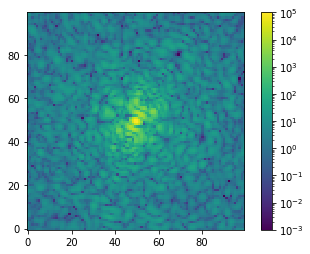

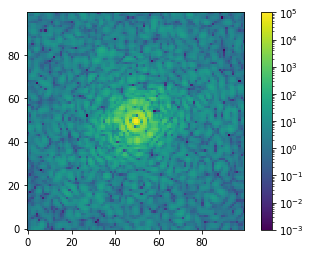

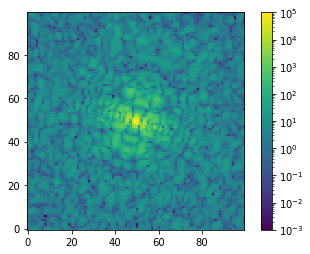

In [43]:
plotDiffr('./diffr_100x100_50k.h5',
          idx_range = (1,3),
          n_diffr=3,
          vmin = '1e-3',
          vmax = '1e5')

<HDF5 group "/data" (50000 members)>
0000001
mean=127.69, max=28376.58, min=0.00
0001000
mean=96.21, max=28718.10, min=0.00
0002000
mean=102.61, max=28728.69, min=0.00


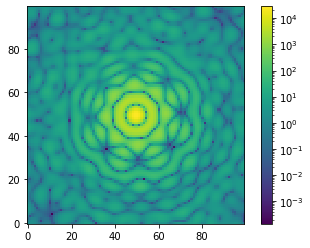

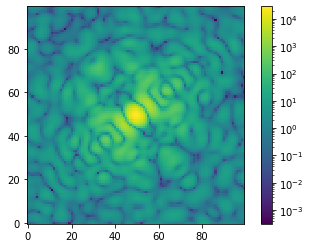

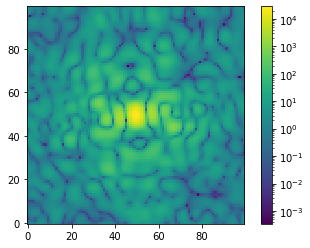

In [46]:
plotDiffr('./diffr_100x100_50k_unifrom.h5',idx_range=[1,2000],n_diffr=3)